<a href="https://colab.research.google.com/github/tbazzi/Data-Science---Fullstack-Bootcamp/blob/master/S4_2_1_Reconna%C3%AEtre_des_visages_avec_SVM_Exercice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reconnaître des visages avec SVM

SVM est un algorithme assez puissant pour faire de la classification. Bien qu'on puisse l'utiliser sur des datasets classiques, tentons de regarder comment on pourrait faire de la reconnaissance de visages connus avec l'algorithme. 

0. Importez les librairies usuelles 

In [0]:
import seaborn as sns
import pandas as pd
import numpy as np
#import matplotlib as plt
import matplotlib.pyplot as plt

1. Dans ```sklearn.datasets``` importez ```fetch_lfw_people```

Mettez ces données dans un DataFrame 

In [0]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
print(lfw_people.DESCR)

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenC

2. Regardez la variables ```target_names```

In [0]:
lfw_people.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


3. Regardez la ```shape``` des images 

In [0]:
lfw_people.images.shape[0]

1288

(1348, 62, 47)


---> Nous obtenons une np.array en trois dimension. La première dimension représente les pixels en lignes de votre image soit la **longueur de l'image**, la seconde dimension représente les pixels en colonnes, soit la **largeur de l'image** et la dernière représente la couleur de votre image. 

4. Dans matplotlib, vous avez une méthode qui s'appelle ```imshow()``` qui vous permet de voir une image. Essayez d'utiliser cette méthode pour visualiser une image de votre dataset 

7


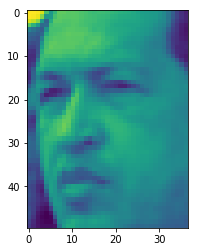

In [0]:
print(len(lfw_people.target_names))
#print(lfw_people.images[0])
plt.imshow(lfw_people.images[0])

Text(0.5, 0, 'George W Bush')

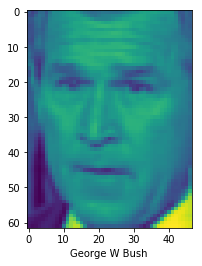

5. Tentez maintenant de regarder les 15 premières images en utilisant une boucle

Pour cela, regardez la documentation de :

1. [enumerate()](http://book.pythontips.com/en/latest/enumerate.html)
2. [plt.subplots()](https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html)
3. [ax.flat](https://stackoverflow.com/questions/46862861/what-does-axes-flat-in-matplotlib-do)


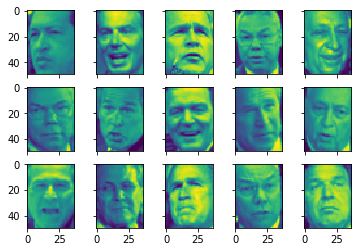

In [0]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=5,nrows=3, sharex=True, sharey=True)

for i, ax in enumerate(axes.flat):
    #ax.scatter([i//2+1, i],[i,i//3])
    #ax.add_image(lfw_people.images[i])
    ax.imshow(lfw_people.images[i])
plt.show()

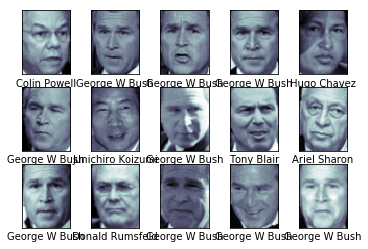

5. Importez Support Vector Machine de Sklearn et instanciez votre modèle 

In [0]:
from sklearn.svm import SVC

svc = SVC()


6. Splittez vos données en train et en test 

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(lfw_people.data, lfw_people.target, test_size = 0.3, random_state=42)

7. Fittez votre données de train et regardez votre score

In [0]:
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.4289405684754522

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

0.18271604938271604

8. Notre score n'est pas incroyable, nous avons peut être fait une erreur dans l'instanciation de notre SVM. Faites une GridSearch pour voir quel modèle serait optimum 

In [0]:
from sklearn.model_selection import GridSearchCV

params = {'kernel':["linear", "rbf", "sigmoid"],
          'C': [0.1, 0.5, 1]}

grid = GridSearchCV(SVC(), param_grid=params, cv=10)
grid_fit = grid.fit(X_train, y_train)
grid_fit.best_estimator_.score(X_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

0.8242894056847545

In [0]:
grid_fit.best_params_

{'C': 0.1, 'kernel': 'linear'}

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  5.7min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 5, 10, 50], 'gamma': [0.0001, 0.0005, 0.001, 0.005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

{'C': 5, 'gamma': 0.0001}


0.39753086419753086

9. Notre score s'améliore mais, on peut encore faire mieux. Nous allons commencer quelque chose que nous allons voir plus en détail dans les prochains cours : PCA 

Le principe de PCA est de combiner les variables dans un modèle pour garder uniquement les éléments les plus explicatifs. 

Dans sklearn import PCA via le code suivant : 

```
from sklearn.decomposition import PCA
```

Vous instancierez cette classe de la façon suivante : 

```
pca = PCA(n_components=0.99, whiten=True, random_state=42)
```

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99, whiten=True, random_state=42)

10. Faites un ```fit_transform``` sur vos données ```X_train``` & ```X_test```

In [0]:
pca.fit_transform(X_train, y_train)
pca.fit_transform(X_test,y_test)

array([[-1.7816509e+00,  1.4821794e+00,  1.1722487e+00, ...,
        -2.1338246e+00,  6.1002856e-01, -1.0694892e+00],
       [-6.4420205e-01, -1.8730088e+00,  5.0487870e-01, ...,
         5.8881089e-02, -1.9589693e-03, -7.7847254e-01],
       [-1.0158814e+00, -6.2039647e-02,  1.2729077e+00, ...,
         3.4442496e-02, -1.2115906e+00,  4.3812880e-01],
       ...,
       [-2.6328239e-01, -1.6140218e+00, -1.6035979e+00, ...,
         5.9718901e-01, -6.3080978e-01,  1.5022860e+00],
       [-3.9831676e-02,  1.4973042e+00,  1.1119010e+00, ...,
         6.7759567e-01,  5.3154445e-01, -1.5039099e+00],
       [-2.3560548e-01,  7.1513742e-01, -3.9159358e-01, ...,
         1.0395129e+00,  1.4325213e+00, -6.8662000e-01]], dtype=float32)

10. Refaites une GridSarch avec les nouvelles données 

In [0]:
from sklearn.model_selection import GridSearchCV

params = {'kernel':["linear", "rbf", "sigmoid"],
          'C': [0.1, 0.5, 1]}

grid = GridSearchCV(SVC(), param_grid=params, cv=10)
grid_fit = grid.fit(X_train, y_train)
grid_fit.best_estimator_.score(X_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

0.8242894056847545

Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   24.6s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [1, 5, 10, 50], 'gamma': [0.0001, 0.0005, 0.001, 0.005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

11. Regardez votre score à nouveau 

0.7851851851851852

12. Créez une variable ```y_pred``` qui contiendra les predictions pour ```X_test_pca```

13. Regardez vos résultats sur une matrice de confusion 

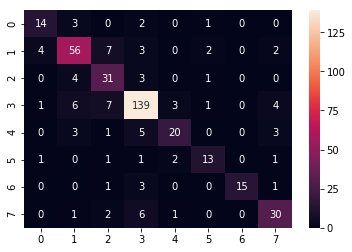

14. Tentons de regarder quelques images avec les prédictions que nous avons faites. De la même manière que nous l'avions fait au début de l'exercice, visualisez des images avec leurs prédictions. 

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

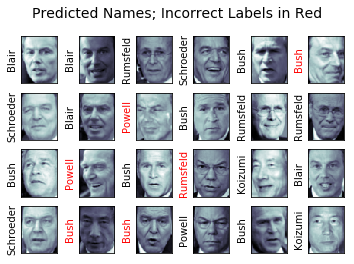